In [1]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
import seaborn as sns
import matplotlib.pyplot as plt
data= pd.read_csv("StudentsPerformance.csv")
print(data)

     gender race/ethnicity parental level of education         lunch  \
0    female        group B           bachelor's degree      standard   
1    female        group C                some college      standard   
2    female        group B             master's degree      standard   
3      male        group A          associate's degree  free/reduced   
4      male        group C                some college      standard   
..      ...            ...                         ...           ...   
995  female        group E             master's degree      standard   
996    male        group C                 high school  free/reduced   
997  female        group C                 high school  free/reduced   
998  female        group D                some college      standard   
999  female        group D                some college  free/reduced   

    test preparation course  math score  reading score  writing score  
0                      none          72             72         

In [2]:
print(data.columns)

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')


In [3]:
  # cleaning
print(data.isnull().sum())    

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64


In [4]:
data=data.drop(["test preparation course","race/ethnicity"],axis=1)#axis =1 يعنى اعمده
print(data)

     gender parental level of education         lunch  math score  \
0    female           bachelor's degree      standard          72   
1    female                some college      standard          69   
2    female             master's degree      standard          90   
3      male          associate's degree  free/reduced          47   
4      male                some college      standard          76   
..      ...                         ...           ...         ...   
995  female             master's degree      standard          88   
996    male                 high school  free/reduced          62   
997  female                 high school  free/reduced          59   
998  female                some college      standard          68   
999  female                some college  free/reduced          77   

     reading score  writing score  
0               72             74  
1               90             88  
2               95             93  
3               57         

In [5]:
# LEBELING
#الlablencoderمش بياجد غير عمود ةاحد عشان كده هنعمل for 
object_data=data.select_dtypes(include=["object"])
le = preprocessing.LabelEncoder()
for i in range(object_data.shape[1]):
    object_data.iloc[:,i]=le.fit_transform(object_data.iloc[:,i])
print(object_data)    

     gender  parental level of education  lunch
0         0                            1      1
1         0                            4      1
2         0                            3      1
3         1                            0      0
4         1                            4      1
..      ...                          ...    ...
995       0                            3      1
996       1                            2      0
997       0                            2      0
998       0                            4      1
999       0                            4      0

[1000 rows x 3 columns]


C:\Users\COMPU MAAROUF\AppData\Local\Temp\ipykernel_5228\903603718.py:6: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  object_data.iloc[:,i]=le.fit_transform(object_data.iloc[:,i])
C:\Users\COMPU MAAROUF\AppData\Local\Temp\ipykernel_5228\903603718.py:6: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  object_data.iloc[:,i]=le.fit_transform(object_data.iloc[:,i])
C:\Users\COMPU MAAROUF\AppData\Local\Temp\ipykernel_5228\903603718.py:6: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace inste

In [6]:
#concat
num_data=data.select_dtypes(exclude=["object"])
data=pd.concat([object_data,num_data],axis=1)
print(data)

     gender  parental level of education  lunch  math score  reading score  \
0         0                            1      1          72             72   
1         0                            4      1          69             90   
2         0                            3      1          90             95   
3         1                            0      0          47             57   
4         1                            4      1          76             78   
..      ...                          ...    ...         ...            ...   
995       0                            3      1          88             99   
996       1                            2      0          62             55   
997       0                            2      0          59             71   
998       0                            4      1          68             78   
999       0                            4      0          77             86   

     writing score  
0               74  
1               88  


                               gender  parental level of education     lunch  \
gender                       1.000000                     0.001913  0.021372   
parental level of education  0.001913                     1.000000  0.006320   
lunch                        0.021372                     0.006320  1.000000   
math score                   0.167982                    -0.068279  0.350877   
reading score               -0.244313                    -0.072444  0.229560   
writing score               -0.301225                    -0.084299  0.245769   

                             math score  reading score  writing score  
gender                         0.167982      -0.244313      -0.301225  
parental level of education   -0.068279      -0.072444      -0.084299  
lunch                          0.350877       0.229560       0.245769  
math score                     1.000000       0.817580       0.802642  
reading score                  0.817580       1.000000       0.954598  
writing

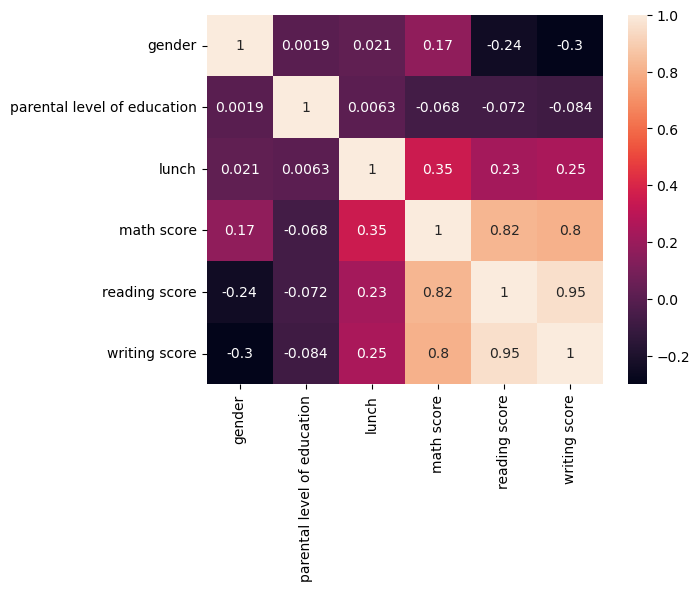

In [7]:
#Relationship
c=data.corr()
print(c)
sns.heatmap(c,annot=True)
plt.show()

